## Multiple Linear Regression

See how modeling, and linear regression in particular, makes it easy to work with more than two explanatory variables. Once you've mastered fitting linear regression models, you'll get to implement your own linear regression algorithm.

### 3D visualizations
Since computer screens and paper are both two-dimensional objects, most plots are best suited to visualizing two variables at once. For the case of three continuous variables, you can draw a 3D scatter plot, but perspective problems usually make it difficult to interpret. There are some "flat" alternatives that provide easier interpretation, though they require a little thinking about to make.

also installing the dependency 'misc3d'



package 'misc3d' successfully unpacked and MD5 sums checked
package 'plot3D' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Migue\AppData\Local\Temp\Rtmp8mbPVO\downloaded_packages


Warning message:
"package 'plot3D' was built under R version 3.6.3"

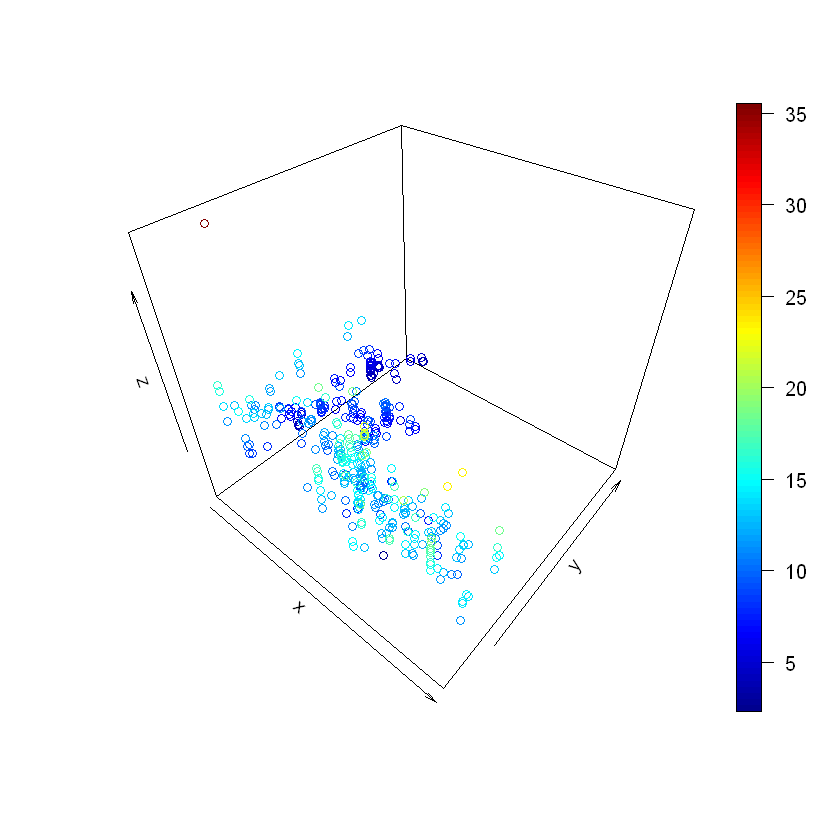

In [2]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
library(broom)
library(moderndive)
library(magrittr) 
# install.packages("plot3D")
library(plot3D)
# read and see data 
taiwan_real_estate = read_fst("taiwan_real_estate2.fst")

# With taiwan_real_estate, draw a 3D scatter plot of
# no. of conv. stores, sqrt dist to MRT, and price
scatter3D(taiwan_real_estate$n_convenience, sqrt(taiwan_real_estate$dist_to_mrt_m), taiwan_real_estate$price_twd_msq)

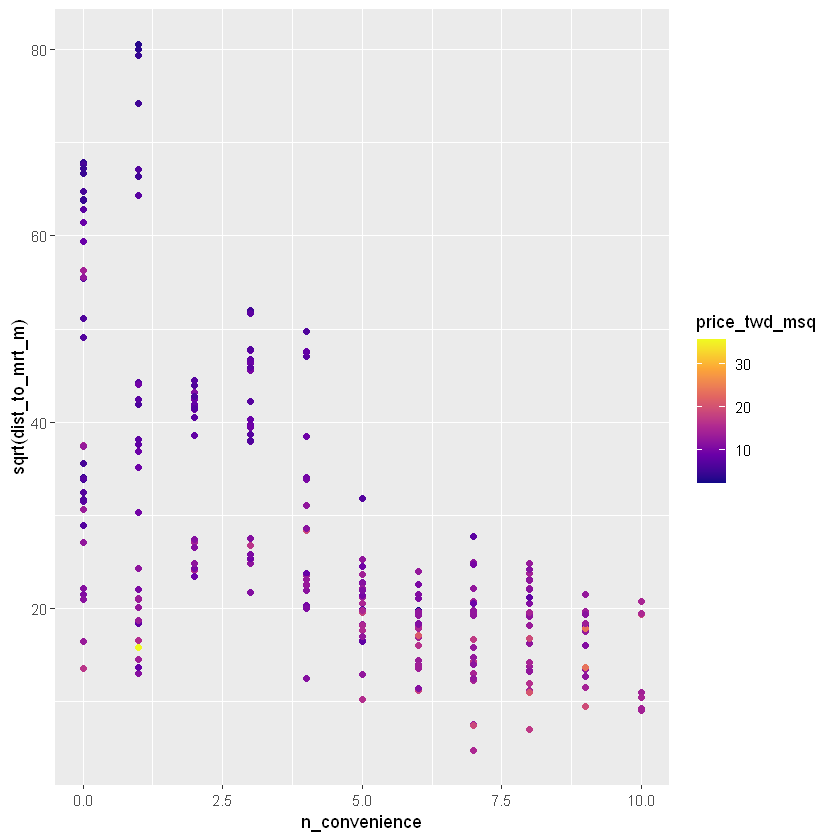

In [3]:
# Using taiwan_real_estate, plot sqrt dist to MRT vs. 
# no. of conv stores, colored by price
ggplot(taiwan_real_estate, aes(x = n_convenience, 
y = sqrt(dist_to_mrt_m), 
color = price_twd_msq)) + 
geom_point()+ 
scale_color_viridis_c(option = "plasma")

### Modeling 2 numeric explanatory variables
You already saw how to make a model and predictions with a numeric and a categorical explanatory variable. The code for modeling and predicting with two numeric explanatory variables in the same, other than a slight difference in how to specify the explanatory variables to make predictions against.

Here you'll model and predict the house prices against the number of nearby convenience stores and the square-root of the distance to the nearest MRT station.

In [4]:
# Fit a linear regression of price vs. no. of conv. stores
# and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist <- lm(price_twd_msq ~ n_convenience + sqrt(dist_to_mrt_m), data = taiwan_real_estate)

# See the result
mdl_price_vs_conv_dist


Call:
lm(formula = price_twd_msq ~ n_convenience + sqrt(dist_to_mrt_m), 
    data = taiwan_real_estate)

Coefficients:
        (Intercept)        n_convenience  sqrt(dist_to_mrt_m)  
            15.1038               0.2142              -0.1573  


In [19]:
# Create expanded grid of explanatory variables with
# no. of conv. stores and  dist. to nearest MRT
explanatory_data <- expand.grid(
    n_convenience = seq(0,10,1),
    dist_to_mrt_m = (seq(0,80,10))^2
)

# Add predictions using mdl_price_vs_conv_dist and explanatory_data
prediction_data <- explanatory_data %>%
mutate(price_twd_msq = predict(mdl_price_vs_conv_dist, explanatory_data))

# See the result
prediction_data

n_convenience,dist_to_mrt_m,price_twd_msq
0,0,14.73733
1,0,15.16158
2,0,15.58583
3,0,16.01009
4,0,16.43434
5,0,16.85859
6,0,17.28284
7,0,17.70709
8,0,18.13134
9,0,18.55559


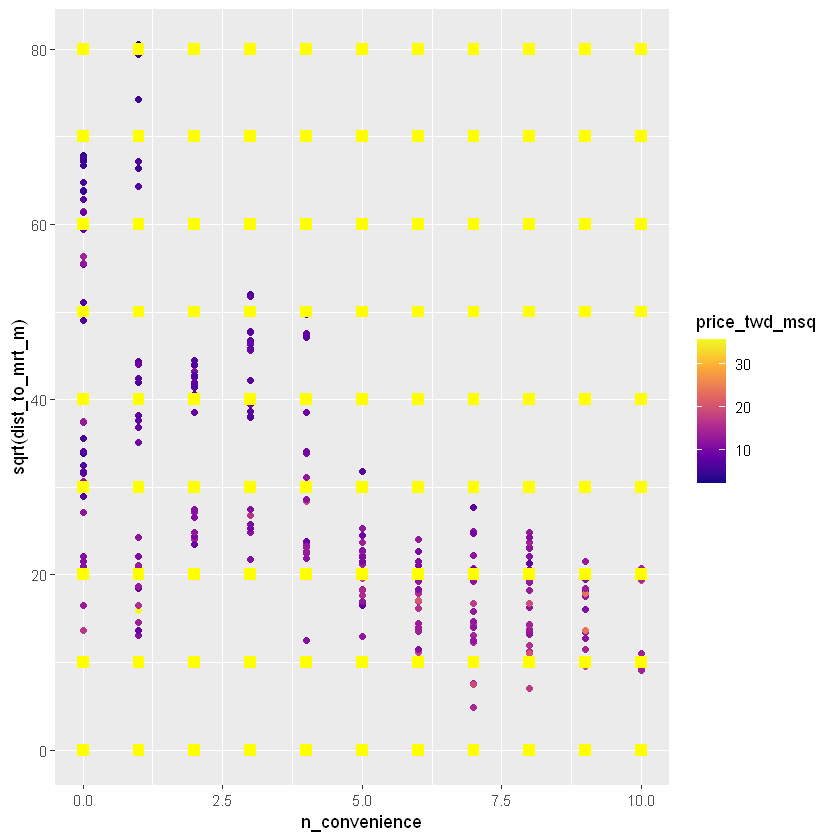

In [8]:
# Add predictions to plot
ggplot(
  taiwan_real_estate, 
  aes(n_convenience, sqrt(dist_to_mrt_m), color = price_twd_msq)
) + 
  geom_point() +
  scale_color_viridis_c(option = "plasma")+
  # Add prediction points colored yellow, size 3
  geom_point(data = prediction_data, color = "yellow", size = 3, shape = 15)

### Including an interaction
Just as in the case with one numeric and one categorical explanatory variable, it is possible that numeric explanatory variables can interact. With this model structure, you'll get a third slope coefficient: one for each explanatory variable and one for the interaction.

Here you'll run and predict the same model as in the previous exercise, but this time including an interaction between the explanatory variables.

In [10]:
# Fit a linear regression of price vs. no. of conv. stores
# and sqrt dist. to nearest MRT, with interaction
mdl_price_vs_conv_dist <- lm(price_twd_msq ~ n_convenience * sqrt(dist_to_mrt_m), data = taiwan_real_estate)

# Create expanded grid of explanatory variables with
# no. of conv. stores and  dist. to nearest MRT
explanatory_data <- expand.grid(
    n_convenience = seq(0,10,1),
    dist_to_mrt_m = (seq(0,80,10))^2
)

# Add predictions using mdl_price_vs_conv_dist and explanatory_data
prediction_data <- explanatory_data %>% 
  mutate(
    price_twd_msq = predict(mdl_price_vs_conv_dist, explanatory_data)
  )

# See the result
prediction_data

n_convenience,dist_to_mrt_m,price_twd_msq
0,0,14.73733
1,0,15.16158
2,0,15.58583
3,0,16.01009
4,0,16.43434
5,0,16.85859
6,0,17.28284
7,0,17.70709
8,0,18.13134
9,0,18.55559


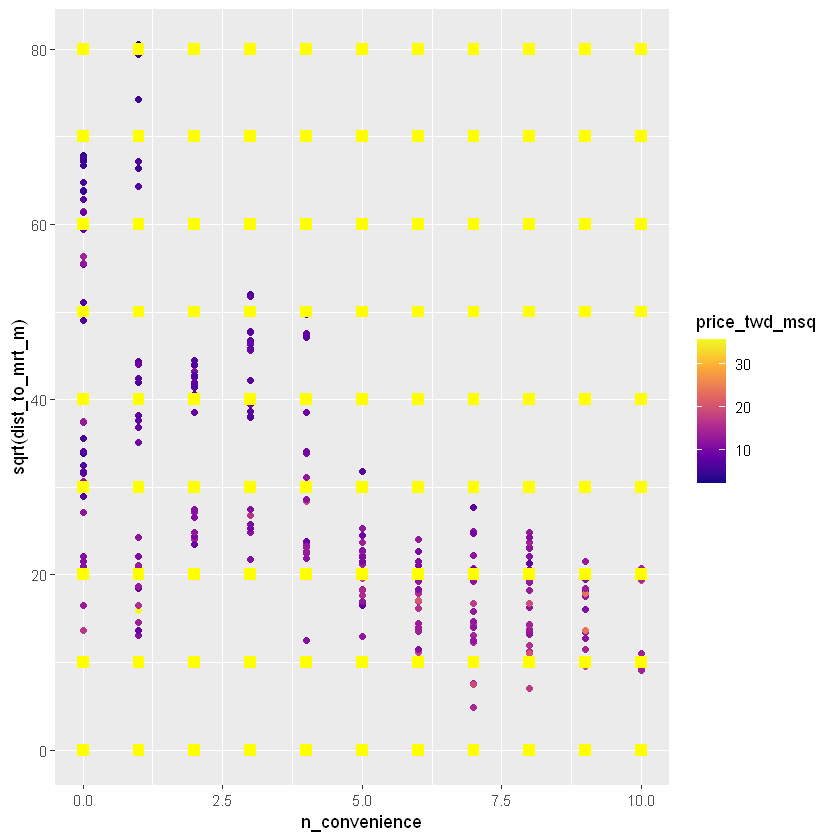

In [11]:
# Add predictions to plot
ggplot(
  taiwan_real_estate, 
  aes(n_convenience, sqrt(dist_to_mrt_m), color = price_twd_msq)
) + 
  geom_point() +
  scale_color_viridis_c(option = "plasma") +
  # Add prediction points colored yellow, size 3
    geom_point(data = prediction_data, color = "yellow", size = 3, shape = 15)
    

### Visualizing many variables
As you begin to consider more variables, plotting them all at the same time becomes increasingly difficult. In addition to using x and y scales for two numeric variables, you can use color for a third numeric variable, and you can use faceting for categorical variables. And that's about your limit before the plots become to difficult to interpret. There are some specialist plot types like correlation heatmaps and parallel coordinates plots that will handle more variables, but they give you much less information about each variable, and they aren't great for visualizing model predictions.

Here you'll push the limits of the scatter plot by showing the house price, the distance to the MRT station, the number of nearby convenience stores, and the house age, all together in one plot.

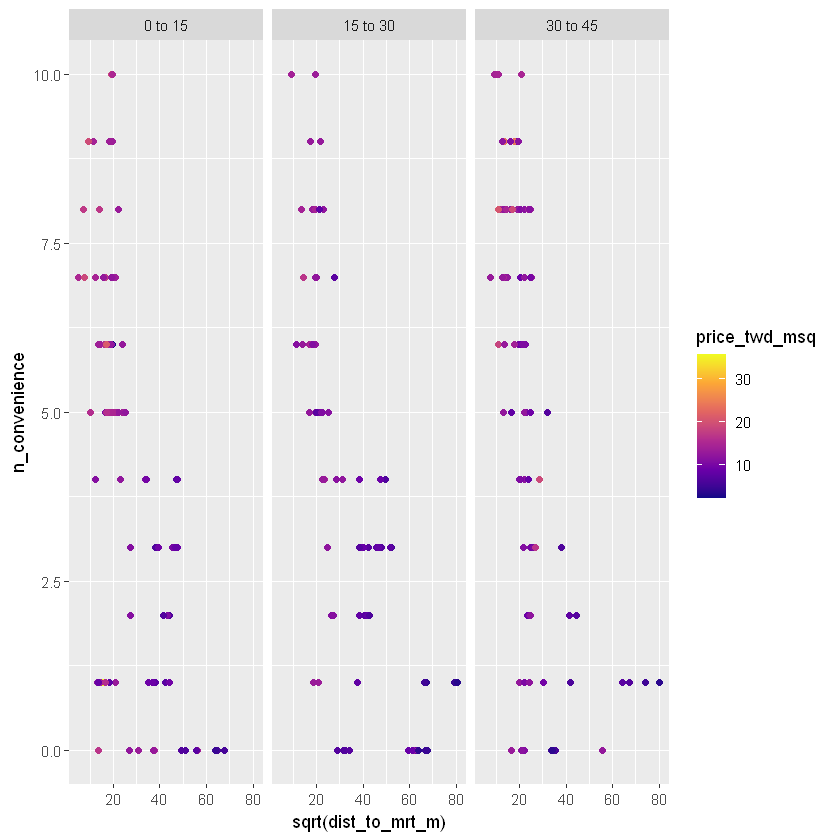

In [14]:
# Using taiwan_real_estate, no. of conv. stores vs. sqrt of
# dist. to MRT, colored by plot house price
ggplot(
  taiwan_real_estate, 
  aes(sqrt(dist_to_mrt_m),n_convenience, color = price_twd_msq)
) +
  # Make it a scatter plot
  geom_point() +
  # Use the continuous viridis plasma color scale
   scale_color_viridis_c(option = "plasma") +
  # Facet, wrapped by house age
  facet_wrap(~house_age_years)

### Different levels of interaction
Once you have three explanatory variables, the number of options for specifying interactions increases. You can specify no interactions. You can specify 2-way interactions, which gives you model coefficients for each pair of variables. The third option is to specify all the interactions, which means the three 2-way interactions and and interaction between all three explanatory variables.

As the number of explanatory variables increases further, the number of interaction possibilities rapidly increases.

In [15]:
### # Model price vs. no. of conv. stores, sqrt dist. to MRT 
# station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter <- lm(price_twd_msq ~ n_convenience + sqrt(dist_to_mrt_m) + house_age_years + 0, data = taiwan_real_estate)

# See the result
mdl_price_vs_all_no_inter


Call:
lm(formula = price_twd_msq ~ n_convenience + sqrt(dist_to_mrt_m) + 
    house_age_years + 0, data = taiwan_real_estate)

Coefficients:
          n_convenience      sqrt(dist_to_mrt_m)   house_age_years0 to 15  
                 0.2577                  -0.1481                  15.4745  
house_age_years15 to 30  house_age_years30 to 45  
                14.1301                  13.7655  


In [16]:
# Model price vs. sqrt dist. to MRT station, no. of conv.
# stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter <- lm(
  price_twd_msq ~ sqrt(dist_to_mrt_m) * n_convenience * house_age_years + 0 + 
  sqrt(dist_to_mrt_m):n_convenience+ sqrt(dist_to_mrt_m):house_age_years+ n_convenience:house_age_years+ sqrt(dist_to_mrt_m):n_convenience:house_age_years, data = taiwan_real_estate
)

# See the result
mdl_price_vs_all_3_way_inter


Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m) * n_convenience * 
    house_age_years + 0 + sqrt(dist_to_mrt_m):n_convenience + 
    sqrt(dist_to_mrt_m):house_age_years + n_convenience:house_age_years + 
    sqrt(dist_to_mrt_m):n_convenience:house_age_years, data = taiwan_real_estate)

Coefficients:
                                      sqrt(dist_to_mrt_m)  
                                                -0.162944  
                                            n_convenience  
                                                 0.374982  
                                   house_age_years0 to 15  
                                                16.046849  
                                  house_age_years15 to 30  
                                                13.760066  
                                  house_age_years30 to 45  
                                                12.088773  
                        sqrt(dist_to_mrt_m):n_convenience  
                              

In [17]:
# Model price vs. sqrt dist. to MRT station, no. of conv.
# stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter <- lm(
  price_twd_msq ~ sqrt(dist_to_mrt_m) + n_convenience + house_age_years + 0 + 
  sqrt(dist_to_mrt_m):n_convenience+ sqrt(dist_to_mrt_m):house_age_years+ n_convenience:house_age_years, data = taiwan_real_estate
)

# See the result
mdl_price_vs_all_2_way_inter


Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m) + n_convenience + 
    house_age_years + 0 + sqrt(dist_to_mrt_m):n_convenience + 
    sqrt(dist_to_mrt_m):house_age_years + n_convenience:house_age_years, 
    data = taiwan_real_estate)

Coefficients:
                        sqrt(dist_to_mrt_m)  
                                  -0.162025  
                              n_convenience  
                                   0.384914  
                     house_age_years0 to 15  
                                  16.026633  
                    house_age_years15 to 30  
                                  13.880791  
                    house_age_years30 to 45  
                                  11.926904  
          sqrt(dist_to_mrt_m):n_convenience  
                                  -0.008956  
sqrt(dist_to_mrt_m):house_age_years15 to 30  
                                   0.031600  
sqrt(dist_to_mrt_m):house_age_years30 to 45  
                                   0.068198  
      

### Predicting again
You've followed the prediction workflow several times now with different combinations of explanatory variables. Time to try it once more on the model with three explanatory variables. Here, you'll use the model with 3-way interactions, though the code is the same when using any of the three models from the previous exercise.

In [21]:
# Make a grid of explanatory data
explanatory_data <- expand.grid(
  # Set dist_to_mrt_m a seq from 0 to 80 by 10s, squared
   dist_to_mrt_m = seq(0,80,10) ^ 2,
  # Set n_convenience to 0 to 10
   n_convenience = 0:10,
  # Set house_age_years to the unique values of that variable
  house_age_years = unique(taiwan_real_estate$house_age_years)
)

# See the result
explanatory_data

dist_to_mrt_m,n_convenience,house_age_years
0,0,30 to 45
100,0,30 to 45
400,0,30 to 45
900,0,30 to 45
1600,0,30 to 45
2500,0,30 to 45
3600,0,30 to 45
4900,0,30 to 45
6400,0,30 to 45
0,1,30 to 45


In [22]:
# Add predictions to the data frame
prediction_data <- prediction_data <- explanatory_data %>% 
  mutate(
    price_twd_msq = predict(mdl_price_vs_all_3_way_inter, explanatory_data)
  )

# See the result
prediction_data

dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,0,30 to 45,12.088773
100,0,30 to 45,11.072148
400,0,30 to 45,10.055524
900,0,30 to 45,9.038900
1600,0,30 to 45,8.022275
2500,0,30 to 45,7.005651
3600,0,30 to 45,5.989027
4900,0,30 to 45,4.972402
6400,0,30 to 45,3.955778
0,1,30 to 45,12.530475


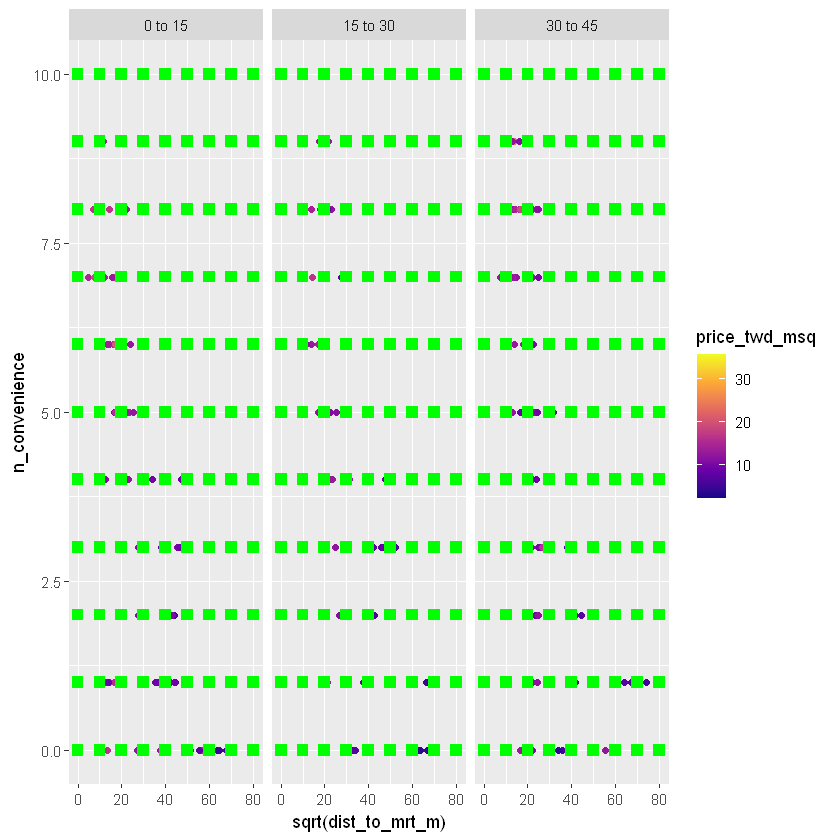

In [24]:
# Extend the plot
ggplot(
  taiwan_real_estate, 
  aes(sqrt(dist_to_mrt_m), n_convenience, color = price_twd_msq)
) +
  geom_point() +
  scale_color_viridis_c(option = "plasma") +
  facet_wrap(vars(house_age_years)) +
  # Add points from prediction data, size 3, shape 15
  geom_point(data = prediction_data, color = "green", size = 3, shape = 15)

# The plot nicely shows that the house price decreases as the square-root of the distance to the nearest MRT station increases, 
# and increases as the number of nearby convenience stores increases, and is higher for houses under 15 years old.

### Linear regression algorithm
To truly understand linear regression, it is helpful to know how the algorithm works. The code for lm() is hundreds of lines because it has to work with any formula and any dataset. However, in the case of simple linear regression for a single dataset, you can implement a linear regression algorithm in just a few lines of code.

The workflow is

1. Write a script to calculate the sum of squares.
2. Turn this into a function.
3. Use R's general purpose optimization function find the coefficients that minimize this.

The explanatory values ( the n_convenience column of taiwan_real_estate) are available as x_actual. The response values (the price_twd_msq column of taiwan_real_estate) are available as y_actual.

In [29]:
x_actual = taiwan_real_estate$n_convenience
y_actual = taiwan_real_estate$price_twd_msq
# Set the intercept to 10
intercept <- 10

# Set the slope to 1
slope <- 1

# Calculate the predicted y values
y_pred <- intercept + slope * x_actual

# Calculate the differences between actual and predicted
y_diff <- y_actual - y_pred

# Calculate the sum of squares
sum(y_diff^2)

[1] 7667.734

In [27]:
calc_sum_of_squares <- function(coeffs) {
  # Get the intercept coeff
  intercept <- coeffs[1]
  # Get the slope coeff
  slope <- coeffs[2]
  # Calculate the predicted y values
  y_pred <- intercept + slope * x_actual
  # Calculate the differences between actual and predicted
  y_diff <- y_actual - y_pred
  # Calculate the sum of squares
  sum(y_diff ^ 2)
}

In [28]:
# Optimize the metric
optim(
  # Initially guess 0 intercept and 0 slope
  par = c(intercept = 0, slope = 0), 
  # Use calc_sum_of_squares as the optimization fn 
  fn = calc_sum_of_squares
)

# Compare the coefficients to those calculated by lm()
lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)

$par
intercept     slope 
8.2260232 0.7977565 

$value
[1] 4717.687

$counts
function gradient 
      87       NA 

$convergence
[1] 0

$message
NULL


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Coefficients:
  (Intercept)  n_convenience  
       8.2242         0.7981  
